## Question 1

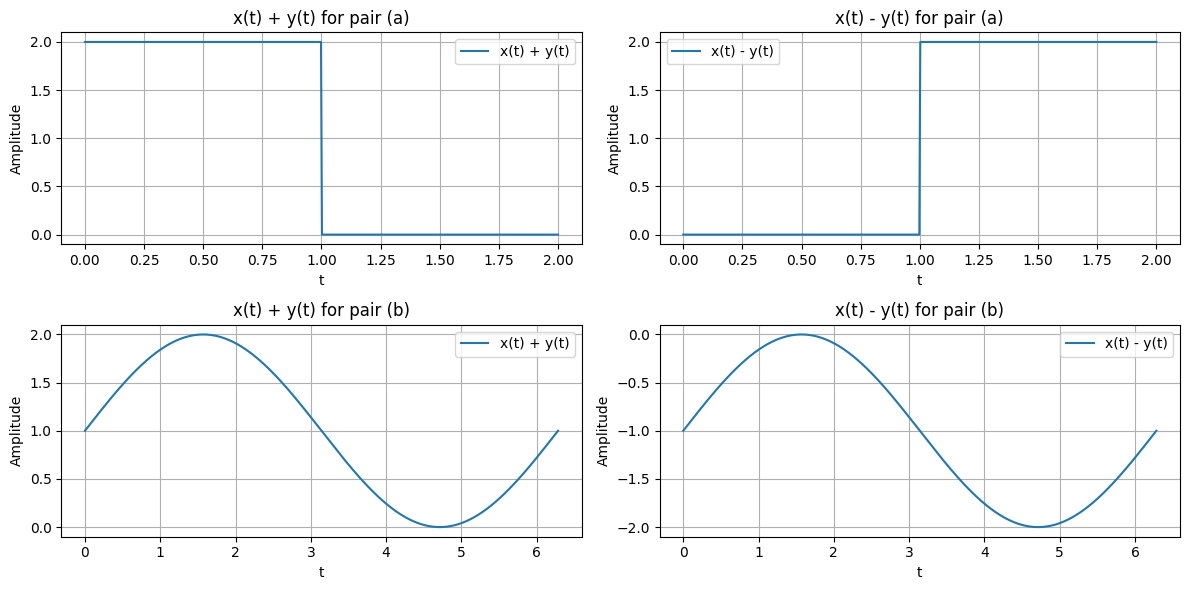

(3.9999999999999996, 4.0, 9.42477796076938, 9.42477796076938)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time vectors
t_a = np.linspace(0, 2, 500)
t_b = np.linspace(0, 2*np.pi, 500)

# Define the signals for pair (a)
x_a = np.piecewise(t_a, [t_a <= 2, t_a > 2], [1, 0])
y_a = np.piecewise(t_a, [t_a < 1, t_a >= 1], [1, -1])

# Define the signals for pair (b)
x_b = np.sin(t_b)
y_b = np.piecewise(t_b, [t_b <= 2*np.pi, t_b > 2*np.pi], [1, 0])

# Calculate the combined signals
x_plus_y_a = x_a + y_a
x_minus_y_a = x_a - y_a
x_plus_y_b = x_b + y_b
x_minus_y_b = x_b - y_b

# Energy calculations for the combined signals
E_x_plus_y_a = np.trapz(x_plus_y_a**2, t_a)
E_x_minus_y_a = np.trapz(x_minus_y_a**2, t_a)
E_x_plus_y_b = np.trapz(x_plus_y_b**2, t_b)
E_x_minus_y_b = np.trapz(x_minus_y_b**2, t_b)

# Plot the combined signals for pair (a)
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(t_a, x_plus_y_a, label='x(t) + y(t)')
plt.title('x(t) + y(t) for pair (a)')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(t_a, x_minus_y_a, label='x(t) - y(t)')
plt.title('x(t) - y(t) for pair (a)')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot the combined signals for pair (b)
plt.subplot(2, 2, 3)
plt.plot(t_b, x_plus_y_b, label='x(t) + y(t)')
plt.title('x(t) + y(t) for pair (b)')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(t_b, x_minus_y_b, label='x(t) - y(t)')
plt.title('x(t) - y(t) for pair (b)')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

(E_x_plus_y_a, E_x_minus_y_a, E_x_plus_y_b, E_x_minus_y_b)


## Question 2

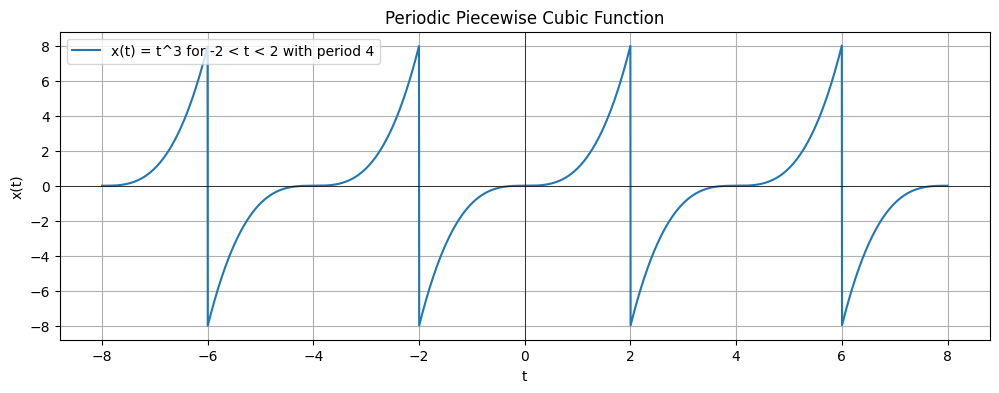

9.142857142857142

In [22]:
# Define the piecewise cubic function that repeats every 4 units
def piecewise_cubic(t):
    # Map t to a value within the range -2 to 2
    mapped_t = ((t + 2) % 4) - 2
    # Return the cubic of the mapped value
    return mapped_t ** 3

# Generate a range of t values over several periods
t_values = np.linspace(-8, 8, 4000)

# Apply the piecewise cubic function to generate y values
y_values = np.array([piecewise_cubic(t) for t in t_values])

# Plot the function
plt.figure(figsize=(12, 4))
plt.plot(t_values, y_values, label='x(t) = t^3 for -2 < t < 2 with period 4')
plt.title('Periodic Piecewise Cubic Function')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

# Define the square of the piecewise cubic function
def square_of_piecewise_cubic(t):
    return piecewise_cubic(t) ** 2

# Compute the integral of the square of the function over one period from -2 to 2
# Since the function is periodic and symmetrical, we can compute the integral over any period
# We choose -2 to 2 for convenience
integral_result, _ = quad(square_of_piecewise_cubic, -2, 2)

# Compute the power by dividing the integral by the period
power = integral_result / period

power



## Question 3

In [28]:
from sympy import symbols, cos, sin, pi, integrate, sqrt, exp, I, simplify

# Define symbols
t, alpha, omega0 = symbols('t alpha omega0')
T = 2*pi / 100  # Period for the first signal

# Signals
b = 10*cos(100*t + pi/3) + 16*sin(150*t + pi/5)

# function to calculate power and RMS of a signal
def calculate_power_and_rms(signal, period):
    power = integrate(signal**2, (t, 0, period)) / period
    rms = sqrt(power)
    return (power), (rms)

# Calculate for each signal
power_b, rms_b = calculate_power_and_rms(b, 2*pi / 150)
display({ "Power" : power_b.evalf(), "rms":  rms_b.evalf()})



{'Power': 229.882678038034, 'rms': 15.1618824041751}

## Question 4

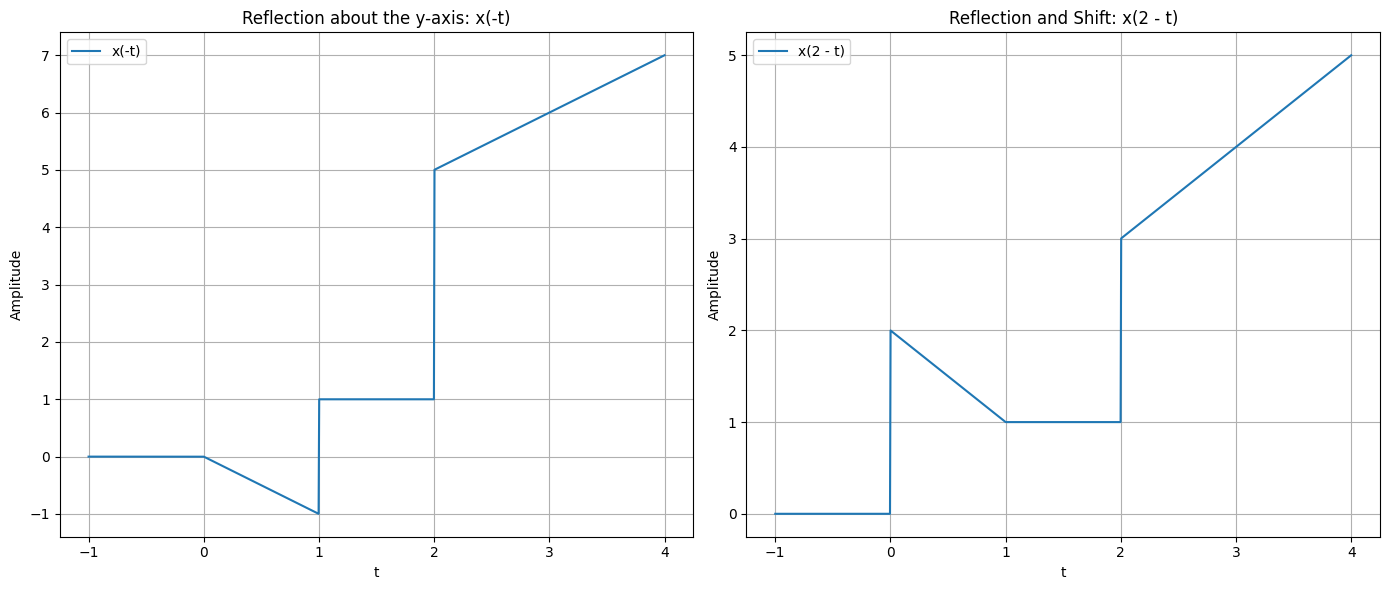

In [17]:
#NOTE come back and plug in real function
import numpy as np
import matplotlib.pyplot as plt

# Define the time vector
t = np.linspace(-1, 4, 1000)

# Define the original signal x(t)
x_t = np.piecewise(t, [t < 0, (t >= 0) & (t < 1), (t >= 1) & (t <= 2), t > 2], [0, lambda t: t, 1, lambda t: 3 - t])

# Define the transformed signals
x_neg_t = np.piecewise(-t, [t < 0, (t >= 0) & (t < 1), (t >= 1) & (t <= 2), t > 2], [0, lambda t: t, 1, lambda t: 3 - t])
x_2_minus_t = np.piecewise(2 - t, [t < 0, (t >= 0) & (t < 1), (t >= 1) & (t <= 2), t > 2], [0, lambda t: t, 1, lambda t: 3 - t])

# Plot the signals
plt.figure(figsize=(14, 6))

# Plot x(-t)
plt.subplot(1, 2, 1)
plt.plot(t, x_neg_t, label='x(-t)')
plt.title('Reflection about the y-axis: x(-t)')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

# Plot x(2 - t)
plt.subplot(1, 2, 2)
plt.plot(t, x_2_minus_t, label='x(2 - t)')
plt.title('Reflection and Shift: x(2 - t)')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



## Question 5

## Question 6

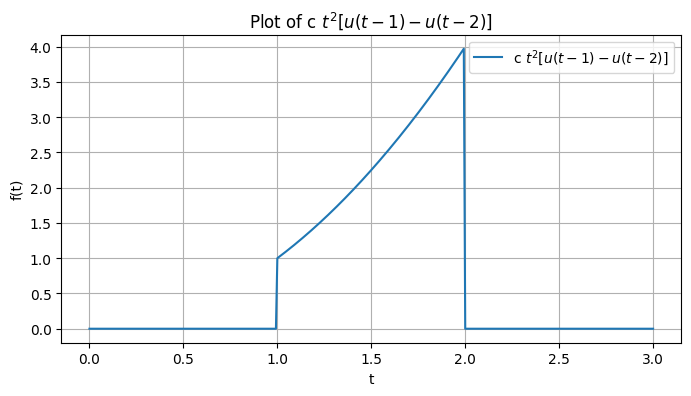

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(t):
    return t**2 * (np.heaviside(t - 1, 1) - np.heaviside(t - 2, 1))

# Generate time points
t = np.linspace(0, 3, 400)

# Calculate function values
y = f(t)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(t, y, label='c $t^2[u(t-1) - u(t-2)]$')
plt.xlabel('t')
plt.ylabel('f(t)')
plt.title('Plot of c $t^2[u(t-1) - u(t-2)]$')
plt.legend()
plt.grid(True)
plt.show()


## Question 7

In [5]:
from sympy import symbols, sin, DiracDelta, simplify

# Define symbols
t, w = symbols('t w')

# Expression (a)
expr_a = (sin(t) / (t**2 + 2)) * DiracDelta(t)

# Expression (b)
expr_b = ((1j*w + 2) / (w**2 + 9)) * DiracDelta(w)


# Evaluate expressions at t=0 and w=0 to fully simplify using properties of Dirac Delta
evaluated_a = expr_a.subs(t, 0)
evaluated_b = expr_b.subs(w, 0)

# Simplify evaluations
simplified_evaluated_a = simplify(evaluated_a)
simplified_evaluated_b = simplify(evaluated_b)
simplified_evaluated_f = simplify(evaluated_f)

display("a : " ,simplified_evaluated_a)
display("b : ", simplified_evaluated_b)


'a : '

0

'b : '

2*DiracDelta(0)/9

## Question 8

In [12]:
from sympy import symbols, sin, DiracDelta, simplify, exp, pi, cos, integrate, oo
x_t, t, w, x = symbols('x_t, t, w, x ')

expr_e = DiracDelta(t + 3) * exp(-t)
expr_g = DiracDelta(3 - t)  # The integral of this with respect to dt gives x(2 - t) at t=3 by Dirac Delta property
# Integrals that require computation
integral_e = integrate(expr_e, (t, -oo, oo))
integral_g = integrate(expr_g, (t, -oo, oo))

# Display computed integrals
p = ["e", "g"]
[display(f"{p[i]} = {x} ") for i, x in enumerate((integral_e, integral_g))] 
pass


'e = exp(3) '

'g = 1 '

## Question 9

In [14]:
from sympy import symbols, cos, exp, I

# Define symbols
t, sigma, omega = symbols('t sigma omega')

# Given sinusoids for parts (c) and (e)
sinusoid_c = exp(2*t) * cos(3*t)
sinusoid_e = exp(2*t)

# Convert sinusoids to their exponential form using Euler's formula for cos
# For (c) e^(2t)cos(3t) => e^(2t + 3j*t) + e^(2t - 3j*t)
# For (e) e^(2t)
s_c_pos = 2 + 3*I  # s = σ + jω for (c)
s_c_neg = 2 - 3*I  # s = σ - jω for (c)
s_e = 2            # s for (e), since it's just e^(σt) with σ=2

s_c_pos, s_c_neg, s_e


(2 + 3*I, 2 - 3*I, 2)

## Question 10

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

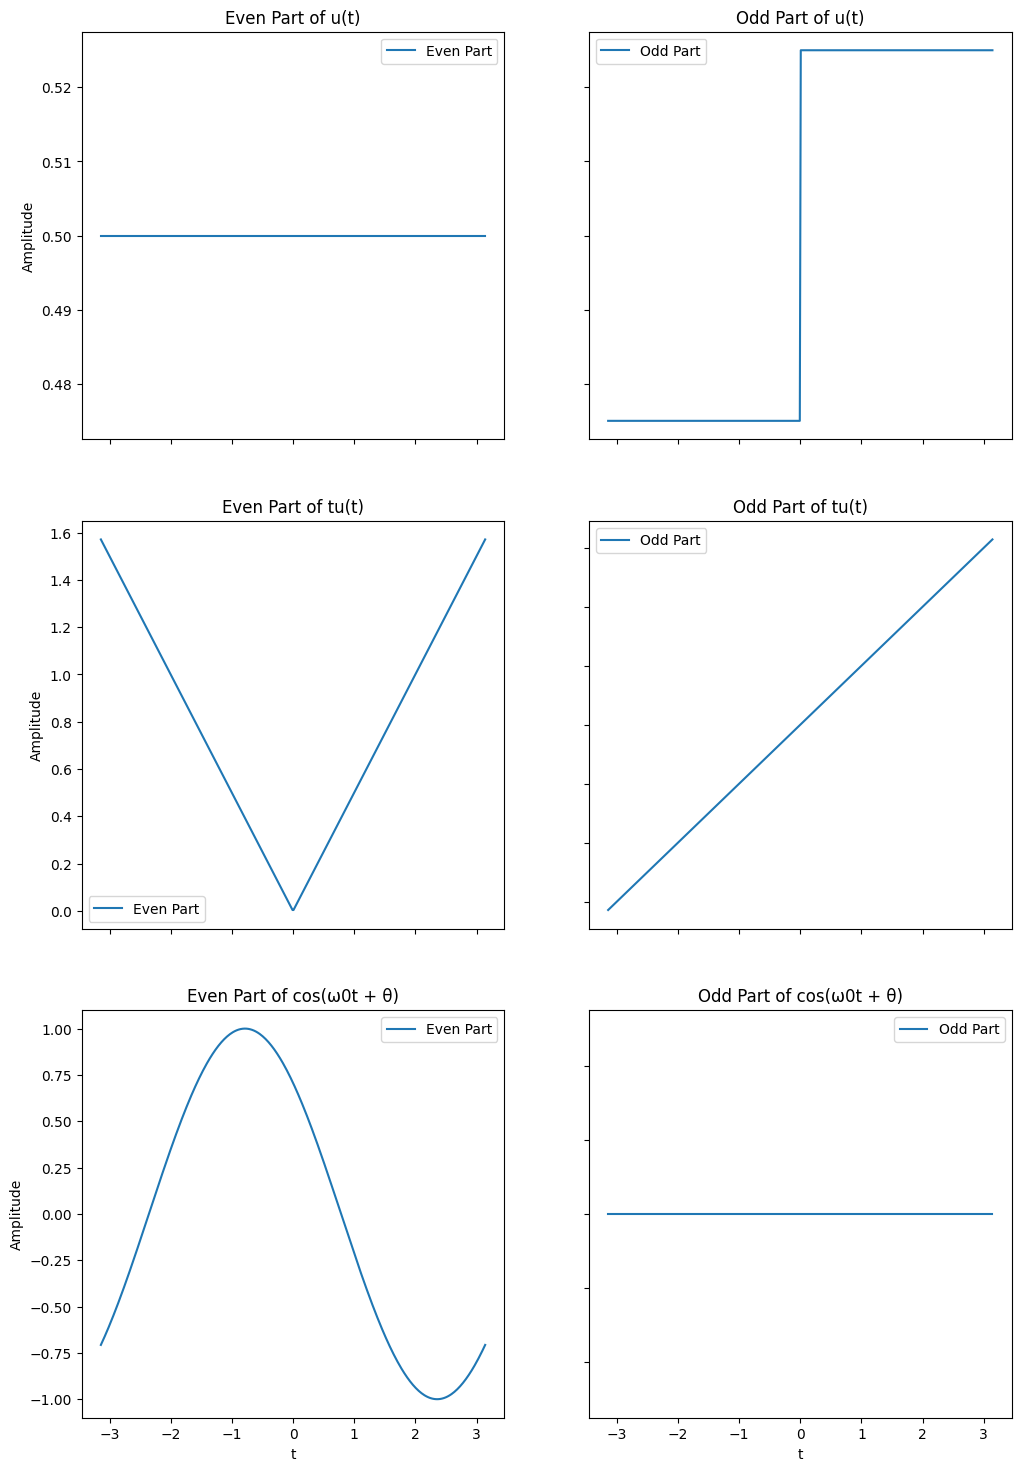

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Define the time vector from -pi to pi
t = np.linspace(-np.pi, np.pi, 400)
omega_0 = 1  # Angular frequency
theta = np.pi / 4  # Phase

# Function definitions
# u(t)
u_t = np.heaviside(t, 1)

# tu(t)
tu_t = t * np.heaviside(t, 1)

# cos(ω0t + θ)
cos_wt_theta = np.cos(omega_0 * t + theta)

# Even and odd components
# For u(t)
even_u_t = 0.5 * np.ones_like(t)
odd_u_t = 0.5 * (np.heaviside(t, 1) - np.heaviside(-t, 0))

# For tu(t)
even_tu_t = 0.5 * (t * np.heaviside(t, 1) + (-t) * np.heaviside(-t, 1))
odd_tu_t = 0.5 * (t * np.heaviside(t, 1) - (-t) * np.heaviside(-t, 1))

# For cos(ω0t + θ)
even_cos_wt_theta = cos_wt_theta  # Even part of cos is itself
odd_cos_wt_theta = np.zeros_like(t)  # Odd part of cos is 0

# Plotting
fig, axs = plt.subplots(3, 2, figsize=(12, 18))

# Plot settings
titles = ['u(t)', 'tu(t)', 'cos(ω0t + θ)']
even_components = [even_u_t, even_tu_t, even_cos_wt_theta]
odd_components = [odd_u_t, odd_tu_t, odd_cos_wt_theta]

for i in range(3):
    axs[i, 0].plot(t, even_components[i], label='Even Part')
    axs[i, 1].plot(t, odd_components[i], label='Odd Part')
    axs[i, 0].set_title(f'Even Part of {titles[i]}')
    axs[i, 1].set_title(f'Odd Part of {titles[i]}')
    axs[i, 0].legend()
    axs[i, 1].legend()

for ax in axs.flat:
    ax.set(xlabel='t', ylabel='Amplitude')
    ax.label_outer()

plt.tight_layout
